<a href="https://colab.research.google.com/github/se-nishioka/MachineLearningWithPython/blob/master/Chapter02_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.1クラス分類と回帰
クラス分類(classification)と回帰(Regression)  
- クラス分類は予め定められた**クラスラベル**を予測
- 回帰は**連続値**の予測
出力予測が連続値か否か

#2.3 教師あり機械学習アルゴリズム

In [1]:
#お決まり処理
!pip install mglearn

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
#from sklearn.datasets import make_blobs
#from sklearn.model_selection import train_test_split

     |████████████████████████████████| 542kB 3.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=d012ee3f16389b732b3e750213715d5753b9519b7480277115093ee97fde592e
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 2.3.1 サンプルデータセット

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:(26, 2)


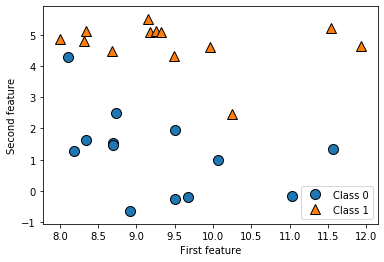

In [2]:
# 分類データセットの例

# データセットの生成
X,y=mglearn.datasets.make_forge() # 警告は無視
# データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'Target')

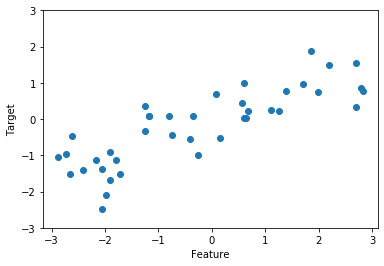

In [3]:
# 回帰データセットの例

X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
# クラス分類用データ

#乳がんのデータセット 良性benign 悪性mailignant
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# 配列構造の確認
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [6]:
# クラスごとのサンプルの個数
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
# zipの意味がわからなかったので個人的に
print(cancer.target_names)
print(np.bincount(cancer.target))

['malignant' 'benign']
[212 357]


In [8]:
#特徴量の名前
print("feature names:\n{}".format(cancer.feature_names))

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# 回帰用のデータ

# 70年代ボストンの住宅価格
from sklearn.datasets import load_boston
boston=load_boston()
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


In [10]:
# 13の特徴量だけを特徴量とするのではなく、特徴量間の積(交互作用interaction)をみることにする。
#つまり、犯罪率と高速道路への利便性を特徴量としてみるのではなく、それらの積も特徴量として考えるのだ。
#このように導入された特徴量を含めることを**特徴量エンジニアリング**feature engineeringと呼ぶ
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


## 2.3.2 k-最近傍法
k-最近傍法k-NNアルゴリズムは最も単純な学習アルゴリズムであると言われている

###2.3.2.1 k-最近傍法によるクラス分類










/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


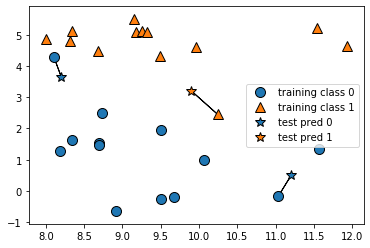

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


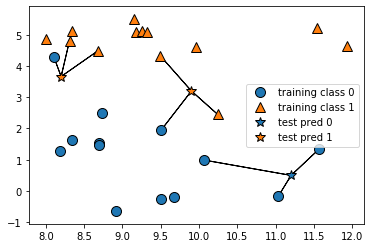

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
# データセットを訓練と検証に分ける
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# クラス分類器をインスタンス化
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

# 訓練セットを利用してクラス分類器を訓練する
clf.fit(X_train,y_train)

# 予測はpredictを使う
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# 汎化性能を評価するためscoreメソッドを実行する
print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy:0.86


###2.3.2.2 KNeighborsClassifierの解析



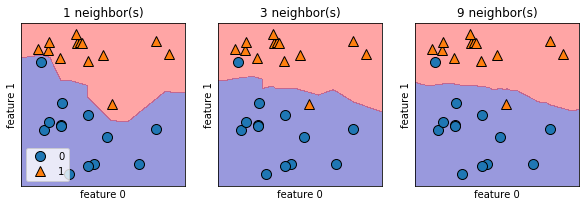

In [15]:
# 決定境界decision boundaryの表示
# k値1,3,9の場合の決定境界を描画比較する
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
  # fitメソッドは自分自身を返すので1行でインスタンスを生成してfitすることが出来る
  clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# 1だと決定境界線は荒くなり、多くなるにつれて滑らかになる
# 最近傍点が少ない場合は複雑度の高いモデルとなり、最近傍点が多い場合は複雑度の低い(汎化)モデルとなる。

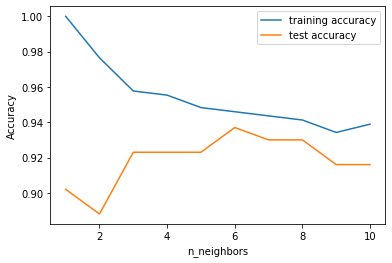

In [16]:
# 複雑さと汎化性能の関係を確認する
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]

#n_neighorsを1から10まで試す
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
  #モデルを構築
  clf=KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)
  #訓練セット精度を記憶
  training_accuracy.append(clf.score(X_train,y_train))
  #汎化精度を記憶
  test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# y軸に訓練セット検証セットの制度を、x軸に最近傍点数をプロットして
# 過剰適合と適合不足の特徴を読み取る。
# 結果的には6当たりが性能が良さげだが、スケール的には最低が90%前後なので悪くはない

###2.3.2.3 k-近傍回帰
k-最近傍法には回帰を行う変わり種がある。

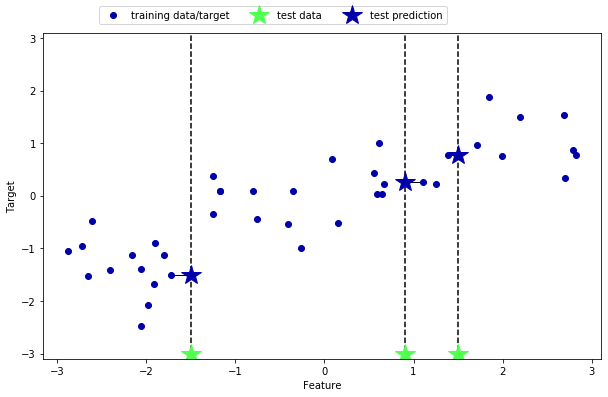

In [17]:
# 最近傍点1の場合
mglearn.plots.plot_knn_regression(n_neighbors=1)

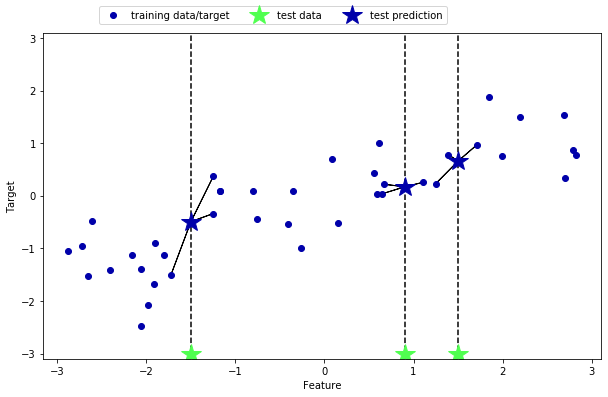

In [18]:
# 最近傍点3の場合
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
#回帰のためのk最近傍アルゴリズムはscikit-learnのKNeighborsRegressorクラスに実装されている
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

#予測の実行
print("test set predictions:\n{}".format(reg.predict(X_test)))


test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [20]:
# scoreメソッドを使って評価を行う
print("test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

test set R^2:0.83


### 2.3.2.4 KNeighborrsRegressorの解析
1次元のデータセットに対してすべての値に対する予定値をみてみる。

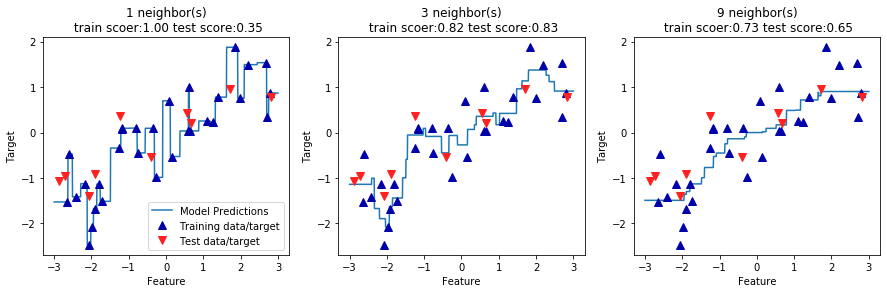

In [21]:
#グラフの初期化1行、３列
fig,axes=plt.subplots(1,3,figsize=(15,4))
#-3から3までの間に1000点のデータポイントを作る
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
  #1,3,9近傍点で予測
  reg=KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train,y_train)
  ax.plot(line,reg.predict(line))
  ax.plot(X_train,y_train,"^",c=mglearn.cm2(0),markersize=8)
  ax.plot(X_test,y_test,"v",c=mglearn.cm2(1),markersize=8)
  ax.set_title(
      "{} neighbor(s)\n train scoer:{:.2f} test score:{:.2f}".format(
          n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)
      )
  )
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(["Model Predictions","Training data/target","Test data/target"],loc="best")

#線がlineデータを利用して予測したもの。近傍点の値により制度が異なる。
#スコアー的には近傍点３が一番精度がよい。 
#訓練データと検証データを赤青でプロットされており、３つの表に違いはない

### 2.3.2.5 利点と欠点とパラメータ
KNeighborsの重要なパラメータは以下の２つ
- 近傍点の数
- データポイント間の距離測度

近傍点はだいたい**3から5**でOKで、距離測度はデフォルトの**ユーグリッド距離**でOK  
k-最近傍法の利点はモデルの理解の子やすさにあるが、訓練セットが多くなると極端に遅くなる。  
k-最近傍法アルゴリズムは理解はしやすいが、処理速度が遅く多くの特徴量が利用できないため実際には殆ど使われていない。


## 2.3.3 線形モデル


### 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


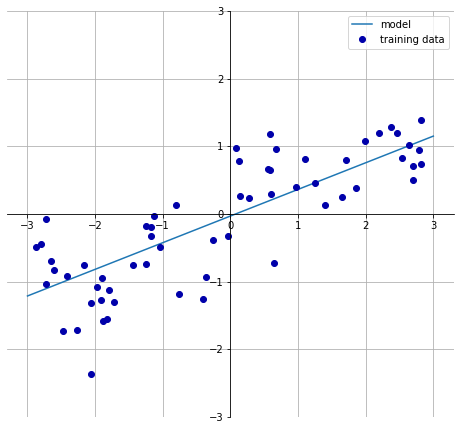

In [22]:
mglearn.plots.plot_linear_regression_wave()

# KNeighborsRegressorに比べると直線になっているため成約が強いが、特徴量が多いデータについては強力に効果を発揮する

### 2.3.3.2 線形回帰(通常最小二乗法)
線形回帰、通常最小二乗法OrdinaryLeasetSquares(OLS)は最も単純で最も古典的な線形回帰手法。

In [0]:
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

In [24]:
# 傾きは重み、係数(coefficient)はcoef_に格納
# オフセット、切片(intercept)はintercept_に格納
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [25]:
print("Trainning set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

# R2が0.66と低い

Trainning set score:0.67
Test set score:0.66


In [0]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

In [27]:
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

# 訓練スコアと検証スコアの乖離は過剰適合の可能性が大

Training set score:0.95
Test set score:0.61


### 2.3.3.3 リッジ回帰
リッジ回帰は線形モデルによる回帰の一つである。予測に用意られる式は通常最小二乗法のものと同じである。  
しかし、リッジ回帰では係数wを訓練データに対する予測だけではなく、他の制約に対しても最適化する。  
ここでは、係数の絶対値の大きさを可能な限り小さくしたい。  
つまり、wの要素をなるべく０に近くしたいのだ。  
直感的には、予測を美味く行いつつ、個々の特徴量が出力に与える影響をなるべく小さくしたい(傾きを小さくしたい)。  
この制約条件は**正規化**(regularization)の一例である。  
正規化とは過剰適合を防ぐために明示的にモデルを成約することである。

In [28]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

# 線形回帰LineaRegressionモデルよりリッジ回帰Ridgeモデルの方がスコアーが高い

Training set score:0.89
Test set score:0.75


線形回帰ではデータに対して過剰適合していた。Ridgeは制約の強いモデルなので、過剰適合の危険は少ない。複雑度の低いモデルは訓練セットに対する性能は低いが汎用性能は高い。我々が興味を持っているのは汎化性能だけなので、LinearRegressionモデルよりRidgeモデルの方が良い

In [29]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

# alphaを小さくすると係数の制約は小さくなる。係数の制約が非常に小さくなると、係数への制約はほとんどなくなり、LinearRegressionと同じような挙動となる

Training set score:0.79
Test set score:0.64


In [30]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))


Training set score:0.93
Test set score:0.77


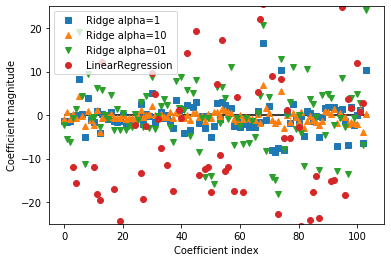

In [31]:
plt.plot(ridge.coef_,"s",label="Ridge alpha=1")
plt.plot(ridge10.coef_,"^",label="Ridge alpha=10")
plt.plot(ridge01.coef_,"v",label="Ridge alpha=01")
plt.plot(lr.coef_,"o",label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

# alphaが大きくなるとバラツキが抑えられて、過剰適合が起きにくくなる

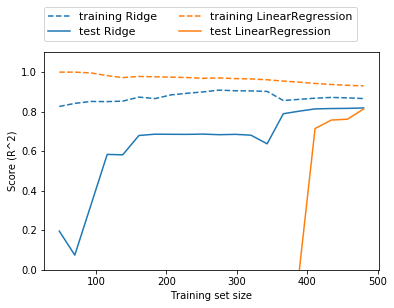

In [32]:
mglearn.plots.plot_ridge_n_samples()

### 2.3.3.4 Lasso
Ridgeに変わる線形回帰としてLassoがある。Lassoも係数が０になるように制約をかけているのだが、書け方が少し違い、こちらはL１正規化と呼ばれる。L１正規化の結果、Lassoにおいてはいくつかの係数が完全に0になる。  
これはモデルにおいていくつかの特徴量が完全に無視されるということになる。自動的に特徴量を選択していると考えて良い。いくつかの係数が０になると、モデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる。

In [33]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso.coef_!=0)))

# 性能は極端に悪い。適合不足である
# 104の特徴量のうち4つしか使っていない

Training set score:0.29
Test set score:0.21
Number of features used:4


In [34]:
# alphaを下げて、max_iter(最大の繰り返し回数)を増やしてみる
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_!=0)))

# alphaを小さくするとより複雑なモデルに適合するようになり、訓練データに対しても検証データに対しても良い結果が得られる
# また104の特徴量のうち33しか使っていない。これにヨットモデルがわかりやすくなる

Training set score:0.90
Test set score:0.77
Number of features used:33


In [35]:
# alphaを小さくしすぎるとリッジと同じで正規化の効果が薄れて過剰適合が発生する
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso00001.coef_!=0)))


Training set score:0.95
Test set score:0.64
Number of features used:96


Text(0, 0.5, 'Coefficient magnitude')

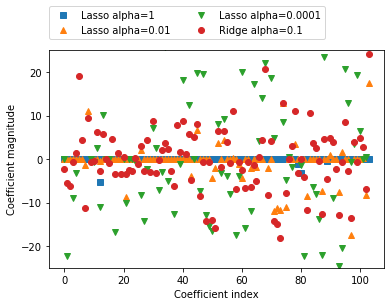

In [36]:
plt.plot(lasso.coef_,"s",label="Lasso alpha=1")
plt.plot(lasso001.coef_,"^",label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,"v",label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,"o",label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")



### 2.3.3.5 クラス分類のための線形モデル

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


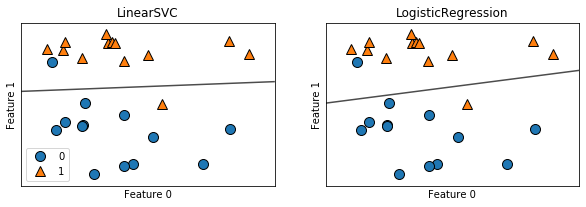

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
  clf=model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax, alpha=0.7)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()


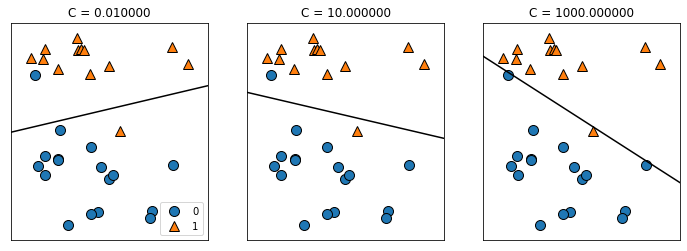

In [38]:
mglearn.plots.plot_linear_svc_regularization()

In [39]:
#LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.953
Test set score:0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2.3.5.2 決定木の複雑さの制御

In [78]:
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.937


In [82]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.951


### 2.3.5.3 決定木の解析

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True
)

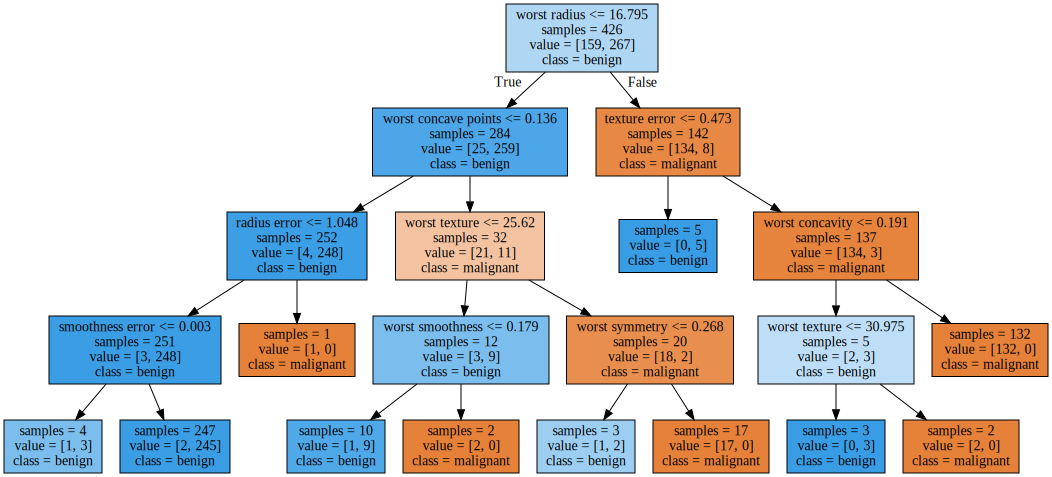

In [84]:
import graphviz
with open("tree.dot")as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

### 2.3.5.4 決定木の特徴量の重要度

In [85]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


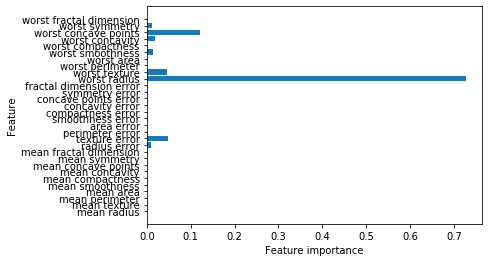

In [86]:
def plot_feature_importances_cancer(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


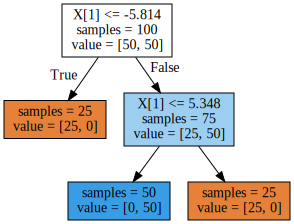

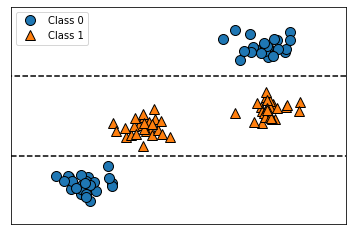

In [87]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)